# Regresión Lineal

En este notebook mostraremos lo básico sobre la regresión lineal simple y regresión lineal múltiple haciendo uso del conjunto de datos introducido en las clases teóricas. 

In [1]:
# Importamos la librería Pandas de Intel
import pandas as pd
import matplotlib.pyplot as plt

## Data Manipulation

In [2]:
data_path = 'data/Advertising.csv'

In [3]:
df = pd.read_csv(data_path)

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


La  columna Unnamed es un índice, no nos interesa, por lo que procederemos a ignorarlo.


In [5]:
columns = ['TV', 'Radio', 'Newspaper', 'Sales'] # Ignoramos el ID
df = df[columns]

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

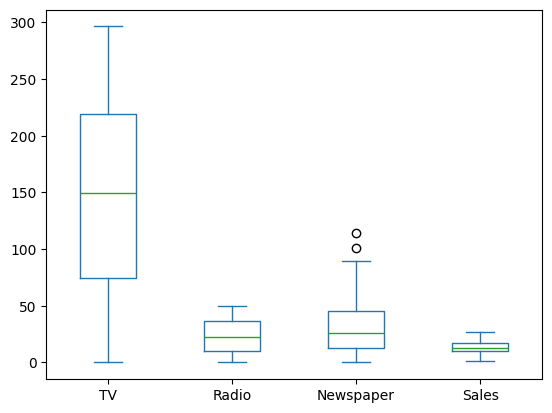

In [7]:
df.plot(kind='box')

Podemos observar que el rango de valores en materia de publicidad es más grande que el rango de valores para radio y para periódicos.
Las inversiones realizadas en este medio o son más o son más caras. 

Las ventas parecen más pequeñas, pero hay que considerar que se encuentran en otra unidad. 
Mientras que los presupuestos se encuentran en miles de dolares, las ventas están en miles de unidades. 

Veamos cómo se relacionan las variables de entrada TV, Newspaper y Radio, con el atributo objetivo o target, Sales

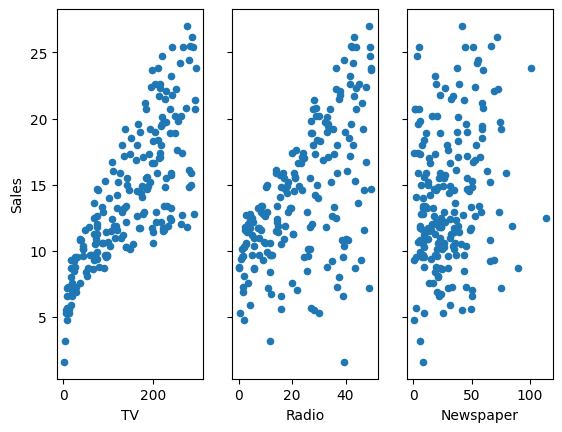

In [8]:
target = 'Sales'
input_attbs = ['TV', 'Radio', 'Newspaper']

# Creamos una estructura para los subplots.
fig, axs = plt.subplots(1, len(input_attbs), sharey='row')

#Agregamos un scatterplot para cada atributo. 
for i, attb in enumerate(input_attbs):
    df.plot(x= attb, y= target, kind='scatter', ax=axs[i])

### Pregunta
¿Qué podemos observar de las tres variables en relación a las ventas obtenidas?

# Regresión lineal simple

In [12]:
from sklearn.linear_model import LinearRegression

En este caso, el modelo de regresión linal no posee demasiados hyperparámetros optimizables. 
Otros modelos de ML poseen más hyperparámetros, y elegir los valores para los mismos puede afectar 
considerablemente los resultados obtenidos.

In [13]:
# Establecemos los hyperparámetros del modelo. 
params = {
    "n_jobs": -1,
    "copy_X": False
}

In [22]:
# Obtenemos un constructor para el modelo de regresión lineal. 
model = LinearRegression(**params)

In [23]:
# Determinamos cuáles van a ser los datos de entrada del modelo, y los datos a predecir
X = df['TV'].to_numpy();
y = df['Sales'].to_numpy();

In [24]:
# Entrenamos el modelo para que aprenda la relación entre las variables.
model.fit(X.reshape(-1,1), y)

,fit_intercept,True
,copy_X,False
,tol,1e-06
,n_jobs,-1
,positive,False


Una vez que entrenamos el modelo, obtenemos una función que describe la relación entre TV y Sales.
Veamos los valores que predice la nueva función, y qué tanto se parece a los datos.

Para eso, vamos a predecir los valores de Sales usando la función generada.

In [25]:
y_predict = model.predict(X.reshape(-1,1))

Veamos entonces estos nuevos valores.

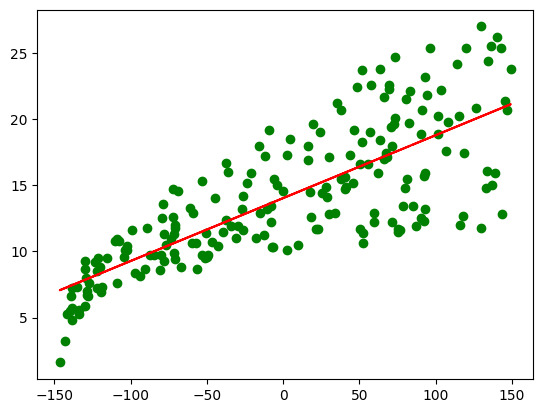

In [26]:
plt.scatter(X, y, color='g') 
plt.plot(X, y_predict, color='r') 
plt.show()

En rojo podemos observar los valores predichos, mientras que en verde vemos los valores reales. Vemos que la curva ajusta bien a los datos.
Veamos los residuos:

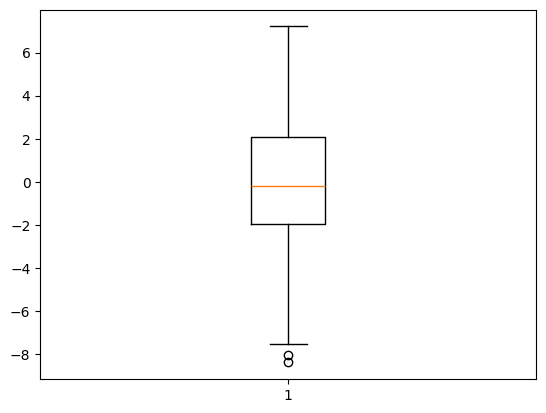

In [27]:
plt.boxplot(y - y_predict);


Podemos observar que los residuos se distribuyen de forma normal alrededor de cero, que es lo que cabría esperar. El modelo no se encuentra sesgado. 

Elevemos al cuadrado para quedarnos con valores solamente positivos.


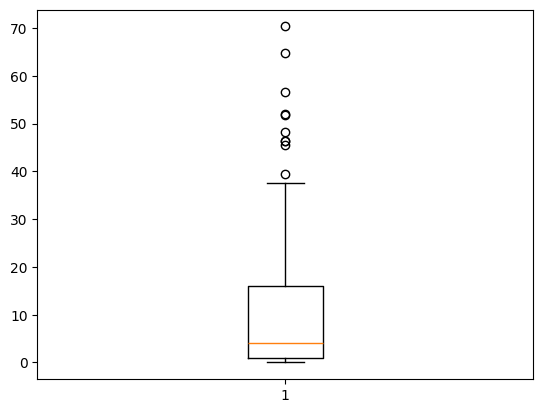

In [28]:
plt.boxplot((y - y_predict)**2);


Observamos que la mediana está por debajo de 10, por lo que la mitad de los errores son menores a sqrt(10), y la mitad son superiores. 

Calculemos ahora el error cuadrático medio.

In [29]:
from sklearn.metrics import mean_squared_error as mse

In [30]:
print(f'El error cuadrático medio para la función {mse(y, y_predict)}')

El error cuadrático medio para la función 10.512652915656759


De media, entonces, el error cuadrático es 10.51 
Si utilizamos la función, el margen de error es entonces sqrt(10.51)*1000 = 3240.

Nos equivocaremos aproximadamente en 3200 unidades al utilizar esta función.

Bueno, pero ¿cuál es la función?


In [ ]:
print(f'(El coeficiente asociado a TV es {model.coef_} mientras que la ordenada al origen es {model.intercept_}')

# Actividad

1. Construir una función de regresión para Radio y para Newspaper.
2. Construir una función de regresión lineal múltiple, que tenga en cuenta los tres atributos simultáneamente.
3. Comparar el error cuadrático medio de todos los casos. 
4. Determinar cuánto incrementan las ventas si invierto 100 unidades extras en TV, 100 unidades en Radio y 100 unidades extras en Newspaper, utilizando la función de regresión lineal múltiple generada. 